<a href="https://colab.research.google.com/github/ohnownihs/NLP/blob/master/learning_spoons_2%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of Words

Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다. Bag of Words를 직역하면 단어들의 가방이라는 의미입니다. 단어들이 들어있는 가방을 상상해봅시다. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그러고나서 이 가방을 흔들어 단어들을 섞습니다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 158kB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 3.6MB 32.4MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## 직접 구현하기

In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
print(bow)

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


## CountVectorizer 사용하기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


## TF-IDF 행렬 만들기

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [ ]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


지금까지 TF-IDF의 가장 기본적인 식에 대해서 학습하고, 이를 실제로 구현하는 실습을 진행해보았습니다. 그런데 사실 실제 TF-IDF 구현을 제공하고 있는 많은 패키지들은 패키지마다 식이 조금씩 다르긴 하지만, 위에서 배운 기본 식에서 조정된 식을 사용합니다. 그 이유는 위의 기본적인 식을 바탕으로 한 구현에도 여전히 문제점이 존재하기 때문입니다. 만약 전체 문서의 수 n이 4인데, df(t)의 값이 3인 경우에는 어떤 일이 벌어질까요? df(t)에 1이 더해지면서 log항의 분자와 분모의 값이 같아지게 됩니다.

이는 log의 진수값이 1이 되면서 idf(d,t)의 값이 0이 됨을 의미합니다. 식으로 표현하면 idf(d,t)=log(n/(df(t)+1))=0입니다. IDF의 값이 0이라면 더 이상 가중치의 역할을 수행하지 못합니다. 그래서 실제 구현체는 idf(d,t)=log(n/(df(t)+1))+1과 같이 log항에 1을 더해줘서 log항의 값이 0이 되더라도 IDF가 최소 1이상의 값을 가지도록 합니다. 사이킷런도 이 방식을 사용합니다.

## Tensorflow로 Bag of Words 구현하기

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [ ]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


각 단어에 숫자 1부터 시작하는 정수 인덱스가 부여되었습니다. 이제 텍스트 데이터에 texts_to_matrix()를 사용해보겠습니다. texts_to_matrix()란 이름에서 알 수 있지만, 이 도구는 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구입니다. texts_to_matrx()는 총 4개의 모드를 지원하는데 각 모드는 'binary', 'count', 'freq', 'tfidf'로 총 4개입니다. 우선 'count' 모드를 사용해봅시다.

In [ ]:
print(t.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


위의 경우는 총 4개의 모드 중에서 'count' 모드를 사용했을 경우입니다. 'count'를 사용하면 우리가 앞서 배운 문서 단어 행렬(Document-Term Matrix, DTM)을 생성합니다. DTM에서의 인덱스는 앞서 확인한 word_index의 결과입니다.

다만 주의할 점은 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작합니다. 실제로 단어의 개수는 9개였지만 완성된 행렬의 열의 개수는 10개인 것과 첫번째 열은 모든 행에서 값이 0인 것을 볼 수 있습니다. 인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문입니다.

우선, 네번째 행을 보겠습니다. 네번째 행은 테스트 데이터에서 네번째 문장을 의미합니다. 네번째 행은 8번째 열, 9번째 열, 10번째 열에서 1의 값을 가집니다. 이는 7번 단어, 8번 단어, 9번 단어가 네번째 문장에서 1개씩 존재함을 의미합니다. 위에서 정수 인코딩 된 결과를 보면 7번 단어는 '저는', 8번 단어는 '과일이', 9번 단어는 '좋아요'입니다. 세번째 행의 첫번째 열의 값은 2인데, 이는 세번째 문장에서 1번 인덱스를 가진 바나나가 두 번 등장했기 때문입니다.

앞서 배웠듯이 DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존되지 않습니다. 사실 더 구체적으로는 4개의 모든 모드에서 단어 순서 정보는 보존되지 않습니다. 이제 'binary' 모드를 보겠습니다.

In [ ]:
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


DTM과 결과가 매우 유사해보입니다. 다만 세번째 행, 두번째 열의 값이 DTM에서는 2였는데 여기서는 1로 바뀌었습니다. 그 이유는 'binary' 모드는 해당 단어가 존재하는지만 관심을 가지고 해당 단어가 몇 개였는지는 무시하기 때문입니다. 해당 단어가 존재하면 1, 단어가 존재하지 않으면 0의 값을 가집니다. 즉, 단어의 존재 유무로만 행렬을 표현합니다. 이제 'tfidf' 모드를 보겠습니다.

In [ ]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


'tfidf' 모드는 말 그대로 TF-IDF 행렬을 만듭니다. 다만, TF-IDF 챕터에서 배운 기본식이나 사이킷런의 TfidfVectorizer에서 사용하는 식이랑 또 조금 다릅니다. 앞서 배운 기본식에서 TF는 각 문서에서의 각 단어의 빈도였다면 'tfidf' 모드에서는 TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의했습니다. idf에서는 앞서 배운 기본식에서 로그는 자연 로그를 사용하고, 로그 안의 분수에 1을 추가로 더했습니다. 물론, 이러한 식을 굳이 기억할 필요는 없고 여전히 TF-IDF의 기존 의도를 갖고 있다고 이해하면 됩니다.

In [ ]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


마지막으로 'freq' 모드입니다. 'freq' 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법입니다. 예를 들어 세번째 행을 보겠습니다. 세번째 문장은 '길고 노란 바나나 바나나' 였습니다. 문서의 크기는 4인데, 바나나는 총 2회 등장했습니다. 이에 따라서 세번째 문장에서의 단어 '바나나'의 값은 위의 행렬에서 0.5가 됩니다. 반면에 '길고', '노란'이라는 두 단어는 각 1회 등장했으므로 각자 1/4의 값인 0.25의 값을 가집니다.

# 텐서플로우 기초

## import 할 때 패키지 네이밍

In [ ]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

## 딥러닝 실행 순서

1. 전처리: 학습에 필요한 데이터 전처리를 수행합니다.  
2. 모델링(model): 모델을 정의합니다.  
3. 컴파일(compile): 모델을 생성합니다.  
4. 학습 (fit): 모델을 학습시킵니다.

아래는 실제 전처리 - 모델링 - 컴파일 - 학습으로 이어지는 코드를 보여줍니다.

In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10)

In [ ]:
from tensorflow.keras.layers import Dense

Dense(10)

In [ ]:
# 필요한 패키지 import
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 전처리
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

# 모델의 정의 (modeling)
model = Sequential([
    Dense(1),
])

# 모델의 생성 (compile)
model.compile(optimizer='sgd', loss='mse')

# 학습 (fit)
model.fit(xs, ys, epochs=1200, verbose=0)

# 검증
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

## 기본 모델 구현 이해하기

tensorflow 2.0은 keras의 Sequential 방식과 동일하게 블록쌓기 방식으로 매우 쉽게 모델링을 할 수 있습니다.  

Dense Layer는 가장 기본적인 신경망 층이라고 이해하시면 됩니다.  

Dense == Fully Connected Layer 라고도 불리웁니다.

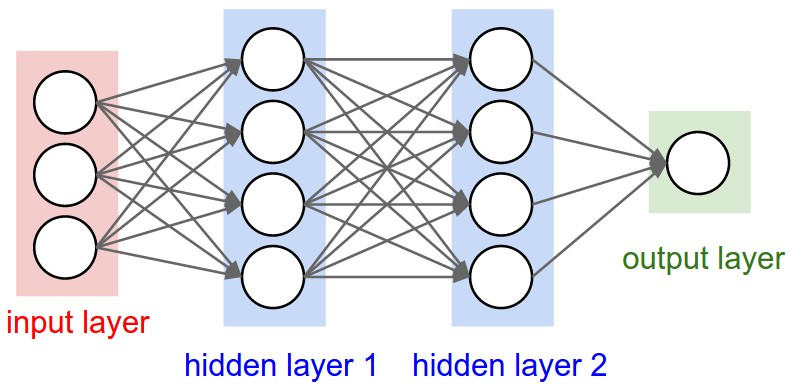

In [ ]:
from IPython.display import Image

Image('https://cs231n.github.io/assets/nn1/neural_net2.jpeg')

In [ ]:
model = Sequential([
    Dense(1),
])

## 적절한 optimizer와 loss 선정하기

우리는 적절한 회귀 값을 예측하는 모델을 만들어야 합니다.  

regression(회귀) 예측을 위해서는 loss=mse를 선택합니다.  

optimizer는 여러가지를 활용할 수는 있지만, 단순 회귀에는 sgd가 적당합니다.

## compile

선정한 optimizer와 loss를 지정해주고 compile 합니다.

In [ ]:
model.compile(optimizer='sgd', loss='mse')

## fit

이제, 모델에 학습을 진행해야합니다. fit() 메소드를 활용하여 학습을 진행합니다.  

학습시, feature, label 값 지정 그리고 epochs을 지정합니다.

In [ ]:
model.fit(xs, ys, epochs=1200, verbose=0)

## Predict로 잘 학습이 되어있는지 검증합니다.

In [ ]:
# output
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

# 선형 회귀 구현하기

In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

In [ ]:
X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 315.1164 - mse: 315.1164
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1668 - mse: 2.1668
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1661 - mse: 2.1661
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1655 - mse: 2.1655
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1648 - mse: 2.1648
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1642 - mse: 2.1642
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1636 - mse: 2.1636
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1630 - mse: 2.1630
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1624 - mse: 2.1624
Epoch 10/300
9/9 [==============================] - 0s 24ms/step - loss: 2.1619 - mse: 2.1619
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.

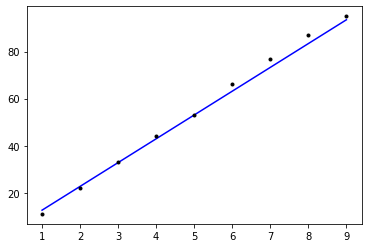

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[98.556465]]


# 로지스틱 회귀 구현하기

In [ ]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

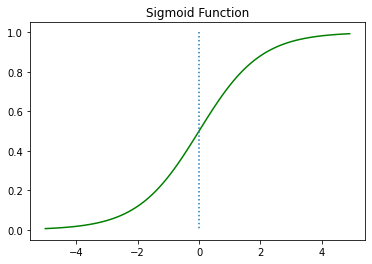

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

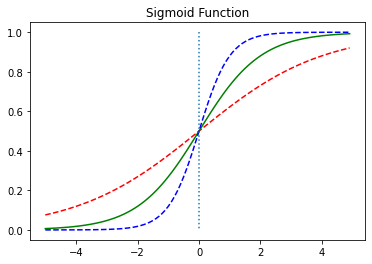

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

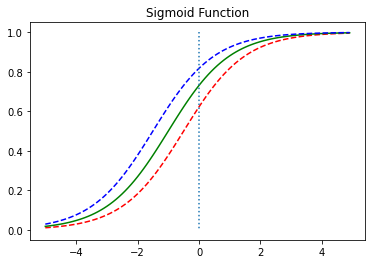

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

In [ ]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6364 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6155 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5946 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5737 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5529 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5321 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5113 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4906 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==========================

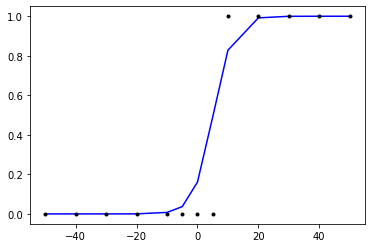

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.20940128]
 [0.26770684]
 [0.3353605 ]
 [0.41052654]
 [0.45000163]]
[[0.8692062 ]
 [0.99403846]
 [0.99976104]
 [0.99999046]
 [1.        ]]


# 다중 선형 회귀 구현하기

중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있고, 그 규칙을 찾고싶다면 이제는 더 이상 독립 변수가 1개가 아닙니다.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
X=np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점
# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
y=np.array([73,82,72,57,34]) # 최종 성적
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

In [ ]:

'''
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
# 학습률(learning rate, lr)은 0.00001로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=2000, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.
'''

"\nmodel=Sequential()\nmodel.add(Dense(1, input_dim=3, activation='linear'))\nsgd=optimizers.SGD(lr=0.00001)\n# 학습률(learning rate, lr)은 0.00001로 합니다.\nmodel.compile(optimizer=sgd ,loss='mse',metrics=['mse'])\n# sgd는 경사 하강법을 의미.\n# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.\nmodel.fit(X,y, batch_size=1, epochs=2000, shuffle=False)\n# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.\n"

# 다중 로지스틱 회귀 구현하기

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
y=np.array([0, 1, 1, 1])
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

In [ ]:
'''
model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=800, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
'''

"\nmodel=Sequential()\nmodel.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.\nmodel.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])\n# sgd는 경사 하강법을 의미.\n# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.\nmodel.fit(X,y, batch_size=1, epochs=800, shuffle=False)\n# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.\n"

# 소프트맥스 회귀 구현하기

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense, Flatten # 케라스의 Dense(), Flatten()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3019 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9768
313/313 - 1s - loss: 0.0780 - accuracy: 0.9758


[0.07796133309602737, 0.9757999777793884]

# 다층 퍼셉트론으로 20개의 뉴스 분류하기

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공합니다.

In [ ]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

위의 subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다. newsdata.keys()를 출력하면 해당 데이터의 속성을 확인할 수 있습니다.

In [ ]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성을 갖고 있습니다. 이 중 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target입니다. 우선 훈련용 샘플의 개수를 보겠습니다.

In [ ]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))


훈련용 샘플의 개수 : 11314


훈련 샘플은 11,314개가 존재합니다. target_names에는 20개의 주제의 이름을 담고있습니다. 어떤 주제가 있는지 확인해보겠습니다.

In [ ]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


이번 챕터 실습의 목적은 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것입니다. 레이블인 target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인해보겠습니다.

In [ ]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [ ]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))


7번 레이블이 의미하는 주제 : rec.autos


In [ ]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [ ]:
data.isnull().values.any()

False

In [ ]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


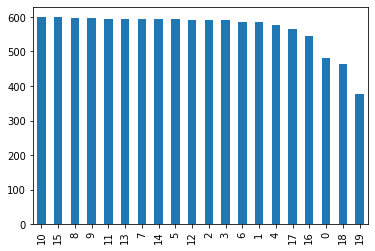

In [ ]:
data['target'].value_counts().plot(kind='bar');

In [ ]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [ ]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [ ]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [ ]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [ ]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [ ]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [ ]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 14ms/step - loss: 2.3028 - accuracy: 0.3381 - val_loss: 0.9875 - val_accuracy: 0.8348
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 0.8687 - accuracy: 0.7612 - val_loss: 0.4757 - val_accuracy: 0.8772
Epoch 3/5
80/80 [==============================] - 1s 6ms/step - loss: 0.4369 - accuracy: 0.8840 - val_loss: 0.3406 - val_accuracy: 0.9108
Epoch 4/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2592 - accuracy: 0.9350 - val_loss: 0.3160 - val_accuracy: 0.9152
Epoch 5/5
80/80 [==============================] - 1s 6ms/step - loss: 0.1853 - accuracy: 0.9557 - val_loss: 0.3072 - val_accuracy: 0.9099
binary 모드의 테스트 정확도: 0.8266064524650574
Epoch 1/5
80/80 [==============================] - 1s 9ms/step - loss: 2.7914 - accuracy: 0.2474 - val_loss: 1.6552 - val_accuracy: 0.7323
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 1.5090 - accuracy: 0.6208 - val_loss: 0.7008 - val_accu

# 다층 퍼셉트론으로 네이버 영화 리뷰 분류하기

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f0ff84a8ac8>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [ ]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [ ]:
'''
import json
import os
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train_docs[0])
'''

'\nimport json\nimport os\nfrom pprint import pprint\n\ndef tokenize(doc):\n    # norm은 정규화, stem은 근어로 표시하기를 나타냄\n    return [\'/\'.join(t) for t in okt.pos(doc, norm=True, stem=True)]\n\nif os.path.isfile(\'train_docs.json\'):\n    with open(\'train_docs.json\') as f:\n        train_docs = json.load(f)\n    with open(\'test_docs.json\') as f:\n        test_docs = json.load(f)\nelse:\n    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]\n    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]\n    # JSON 파일로 저장\n    with open(\'train_docs.json\', \'w\', encoding="utf-8") as make_file:\n        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")\n    with open(\'test_docs.json\', \'w\', encoding="utf-8") as make_file:\n        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")\n\n# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용\npprint(train_docs[0])\n'

In [ ]:
'''
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))
'''

'\ntokens = [t for d in train_docs for t in d[0]]\nprint(len(tokens))\n'

In [ ]:
'''
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))
'''

"\nimport nltk\ntext = nltk.Text(tokens, name='NMSC')\n\n# 전체 토큰의 개수\nprint(len(text.tokens))\n\n# 중복을 제외한 토큰의 개수\nprint(len(set(text.tokens)))            \n\n# 출현 빈도가 높은 상위 토큰 10개\npprint(text.vocab().most_common(10))\n"

In [ ]:
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = '/Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)
'''

"\nimport matplotlib.pyplot as plt\nfrom matplotlib import font_manager, rc\n%matplotlib inline\n\nfont_fname = '/Library/Fonts/AppleGothic.ttf'\nfont_name = font_manager.FontProperties(fname=font_fname).get_name()\nrc('font', family=font_name)\n\nplt.figure(figsize=(20,10))\ntext.plot(50)\n"

In [ ]:
'''
# 시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]
'''

'\n# 시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.\nselected_words = [f[0] for f in text.vocab().most_common(10000)]\n\ndef term_frequency(doc):\n    return [doc.count(word) for word in selected_words]\n\ntrain_x = [term_frequency(d) for d, _ in train_docs]\ntest_x = [term_frequency(d) for d, _ in test_docs]\ntrain_y = [c for _, c in train_docs]\ntest_y = [c for _, c in test_docs]\n'

In [ ]:
'''
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')
'''

"\nimport numpy as np\n\nx_train = np.asarray(train_x).astype('float32')\nx_test = np.asarray(test_x).astype('float32')\n\ny_train = np.asarray(train_y).astype('float32')\ny_test = np.asarray(test_y).astype('float32')\n"

In [ ]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras import optimizers\nfrom tensorflow.keras import losses\nfrom tensorflow.keras import metrics\n\nmodel = models.Sequential()\nmodel.add(Dense(64, activation='relu', input_shape=(10000,)))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n             loss=losses.binary_crossentropy,\n             metrics=[metrics.binary_accuracy])\n\nmodel.fit(x_train, y_train, epochs=10, batch_size=512)\nresults = model.evaluate(x_test, y_test)\n"

# 함수형 API 이야기

## sequential API로 만든 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

## functional API로 만든 모델

앞에서 케라스를 사용하여 모델을 설계하는 방식을 sequential API를 사용하였다고 합니다. 그런데 sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일을 하기에는 한계가 있습니다. 이번에는 복잡한 모델을 생성할 수 있는 방식인 functional API(함수형 API)에 대해서 알아봅니다.

functional API는 각 층을 일종의 함수(function)로서 정의합니다. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계합니다. functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이를 이해해봅시다.



### 피드 포워드 신경망

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 입력
inputs = Input(shape=(10,))

hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)

# 출력
output = Dense(1, activation='sigmoid')(hidden2)

# 입력과 출력 정의
model = Model(inputs=inputs, outputs=output)

### 선형 회귀

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

linear_model.compile(optimizer='sgd', loss='mse')

### 로지스틱 회귀

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

logistic_model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

### 다중 입력을 받는 모델(model that accepts multiple inputs)

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

### 다르게 보이지만 동일한 표기

encoder = Dense(128)(input)  

이와 같은 표현은  

encoder = Dense(128)  
encoder(input)

이 표현과 같습니다.

# 번외 : Soynlp 이야기

## OOV 문제

In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


에이비식스는 아이돌의 이름이고, 이대휘는 에이비식스의 멤버이며, 최애돌은 최고로 애정하는 캐릭터라는 뜻이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보여줍니다.

그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞 뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기라면 어떨까요?

예를 들어 에이비식스라는 문자열이 자주 연결되어 등장한다면 형태소라고 판단하고, 또한 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 형태소로 파악하는 식이지요. 그리고 이런 아이디어를 가진 형태소 분석기가 soynlp입니다.

## soynlp

soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기입니다. 비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석합니다. soynlp 형태소 분석기는 내부적으로 단어 점수 표로 동작합니다. 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용합니다.

In [ ]:
!pip install soynlp

     |████████████████████████████████| 419kB 4.7MB/s 


In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7f0ff8d1bc18>)

다운로드 한 말뭉치를 문서 단위로 분리합니다.

In [ ]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

총 3만 91개의 문서가 존재합니다. 공백이 아닌 문서에 한해 상위 3개의 문서만 출력해봅시다.

In [ ]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 합니다. 이는 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이지요. WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산합니다.

In [ ]:
from soynlp.word import WordExtractor
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 5.186 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


## soynlp의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도입니다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다. 

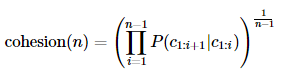

In [ ]:
from IPython.display import Image

Image('https://wikidocs.net/images/page/84111/soynlp.png')

아직은 아리송 할 거에요. '반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정은 아래와 같습니다.

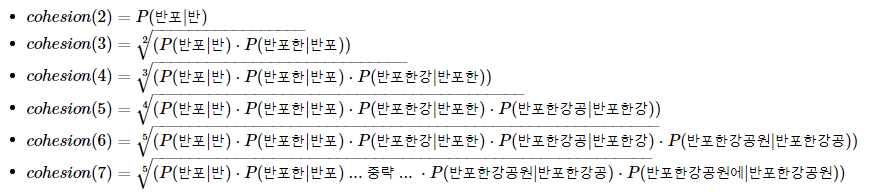

In [ ]:
Image('https://wikidocs.net/images/page/84111/soynlp2.png')

실습을 통해 직접 응집 확률을 계산해보겠습니다.

In [ ]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [ ]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [ ]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [ ]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [ ]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

## soynlp의 브랜칭 엔트로피(branching entropy)

Branching Entropy는 확률 분포의 엔트로피값을 사용합니다.  이는 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도입니다. 이해를 위해 퀴즈를 내보겠습니다. 제가 어떤 단어를 생각 중인데, 한 문자씩 말해드릴테니까 매번 다음 문자를 맞추는 것이 퀴즈입니다.

첫번째 문자는 '디'입니다. 다음에 등장할 문자를 맞춰보세요. 솔직히 가늠이 잘 안 가지요? '디'로 시작하는 단어가 얼마나 많은데요. 이걸 어떻게 맞추냐구요. 정답은 '스' 입니다.

이제 '디스'까지 나왔네요. '디스 '다음 문자는 뭘까요? 벌써 정답 단어를 예측한 분도 있을테고, 여전히 가늠이 잘 안가시는 분도 있을 거에요. '디스카운트'라는 단어가 있으니까 '카'일까? 아니면 '디스코드'라는 단어가 있으니까 '코'인가? 생각해보니 '디스코'가 정답일 수도 있겠네요. 그러면 '코'인가? '디스아너드'라는 게임이 있으니까 '아'? 전부 땡땡땡! 이 단어들을 생각하신 분들은 전부 틀렸습니다. 정답은 '플'이었습니다.

'디스플'까지 왔습니다. 다음 문자 맞춰보세요. 이제 좀 명백해지는군요. 이 정도 되면 헷갈리시는 분들은 거의 없을거에요. 정답은 '레'입니다. '디스플레' 다음에는 어떤 문자일까요? 너무 명백해서 문제라고 보기도 어려워졌어요. 정답은 '이'입니다. 제가 생각한 단어는 '디스플레이'였습니다!

저는 지금 브랜칭 엔트로피를 시뮬레이션한 겁니다. 브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어듭니다. 실습해볼게요.

In [ ]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [ ]:
word_score_table["디스플"].right_branching_entropy

-0.0

'디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가지는 반면, '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가집니다.

In [ ]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [ ]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

갑자기 값이 급증합니다. 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문입니다. 이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피 값이 증가하게 됨을 의미합니다. 그리고 이 값으로 단어를 판단하는 것이 가능하겠죠?

## soynlp의 L tokenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있습니다.

In [ ]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

## 최대 점수 토크나이저

최대 점수 토크나이저는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 점수를 통해 토큰화 된 결과를 보겠습니다.

In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']